In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
file = "data/combined_thin.csv"
dfnew = pd.read_csv(file,low_memory=False)
lstproptypes = ['Apartment', 'House', 'Condominium', 'Townhouse','Loft']

In [129]:
df2=dfnew.loc[dfnew['review_scores_rating']>0]
df=df2.loc[df2['property_type'].isin(lstproptypes)]


In [130]:
lst=[]
lst=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel', 'Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher', 'Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress', 'First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym',
       'Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed',
       'Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator', 'Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

In [131]:
df1 = df[['property_type','review_scores_rating']].groupby('property_type').mean()
df1b=df1.rename(columns={'review_scores_rating': 'AverageRating'})

In [132]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['property_type','review_scores_rating']].groupby('property_type').mean()
    df1b=df1b.join(df2b.rename(columns={'review_scores_rating': each}), on='property_type',how='left')

In [133]:
df_chart = df1b.reset_index()

In [134]:
df_chart.head()

property_type  AverageRating  Accessible  Air conditioning  BBQ grill  \
0     Apartment      93.734487   94.182182         93.894007  95.577558   
1   Condominium      95.813814   96.161049         95.836269  97.571429   
2         House      94.586405   94.313146         94.640893  95.476471   
3          Loft      95.367850   94.878613         95.259394  92.500000   
4     Townhouse      94.964424   95.426230         95.046279  94.074074   

   Baby friendly  Changing table  Bath towel    Bathtub  Beachfront  \
0      95.492780       96.091837         NaN  94.922228        93.6   
1      96.882353       93.800000         NaN  96.602151         NaN   
2      96.473270       96.689189        95.0  96.038411        95.2   
3      96.842105             NaN         NaN  96.314815         NaN   
4      96.063291       93.000000         NaN  96.606557         NaN   

     ...      Long term stays allowed       Pool  Private bathroom  \
0    ...                    94.357354  93.747345         95.793103   
1    ...                    97.000000  96.088803         98.000000   
2    ...                    94.106870  95.452290         96.625000   
3    ...                    94.814815  94.822917         87.000000   
4    ...                    94.709091  94.657407         96.500000   

   Private entrance  Private living room  Refrigerator  Smoking allowed  \
0         94.912988            94.699107     94.709778        91.821472   
1         95.503937            95.930556     96.829268        94.050000   
2         95.842428            95.226804     95.253165        93.914651   
3         97.210526            96.384615     95.423077        94.723684   
4         95.860082            95.089552     95.876033        92.750000   

       Stove  Suitable for events         TV  
0  94.712046            92.429456  94.085746  
1  96.967742            94.666667  95.946408  
2  95.133929            94.167279  94.954187  
3  95.229730            95.136646  95.418440  
4  95.861386            94.925532  95.338042  

[5 rows x 42 columns]

In [135]:
lst1=['Accessible', 'BBQ grill', 'Baby friendly','Bathtub']
lst2=['Beachfront', 'Coffee maker','Elevator', 'Extra pillows and blankets' ]
lst3=['Game console','Garden or backyard','Heating', 'Indoor fireplace']
lst4=['Laptop friendly workspace','Private bathroom', 'Private entrance','Smoking allowed']

In [136]:
lstcolors=["lightskyblue","tan","plum","lightgreen","lightcoral","gold"]#["lightblue","green","lightskyblue","lightcoral","orange","red","purple","pink","yellowgreen"]
x = df_chart.index
y = df_chart['AverageRating']
ylabel = 'Average Rating'
xlabel = 'Property Type'
ymin =df_chart['AverageRating'].min()-(df_chart['AverageRating'].min()*.02)
ymax = 98
xmin=-0.5
xmax=4.5
w=.17
width = 0.15
width1 = width
alpha =.99
alpha1=.90
lsz = 12
wsz = 8
title = 'Average Overal Rating vs Average Rating with Amenities by Property type'

C:\Users\jeff\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


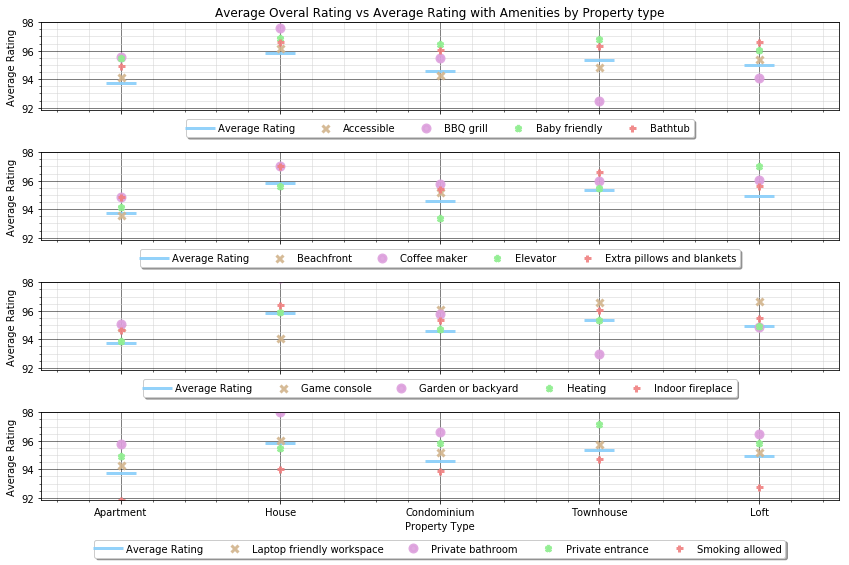

In [137]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(lsz,wsz))

ax1.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax1.plot(x, df_chart[lst1[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax1.plot(x, df_chart[lst1[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax2.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax2.plot(x, df_chart[lst2[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax2.plot(x, df_chart[lst2[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax3.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax3.plot(x, df_chart[lst3[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax3.plot(x, df_chart[lst3[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)

ax4.plot(x, y,alpha=alpha1,color=lstcolors[0],linewidth=1,linestyle='None',marker='_',mew=3,ms=30)
ax4.plot(x, df_chart[lst4[0]],alpha=alpha1,color=lstcolors[1],linewidth=1,linestyle='None',marker='x',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[1]],alpha=alpha1,color=lstcolors[2],linewidth=1,linestyle='None',marker='o',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[2]],alpha=alpha1,color=lstcolors[3],linewidth=1,linestyle='None',marker='*',mew=3,ms=7)
ax4.plot(x, df_chart[lst4[3]],alpha=alpha1,color=lstcolors[4],linewidth=1,linestyle='None',marker='+',mew=3,ms=7)


plt.ylim(ymin,ymax)
plt.xlim(xmin,xmax)

ax1.legend([ylabel,lst1[0],lst1[1],lst1[2],lst1[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax2.legend([ylabel,lst2[0],lst2[1],lst2[2],lst2[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax3.legend([ylabel,lst3[0],lst3[1],lst3[2],lst3[3]],loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
ax4.legend([ylabel,lst4[0],lst4[1],lst4[2],lst4[3]],loc='upper center', bbox_to_anchor=(0.5, -0.4),fancybox=True, shadow=True, ncol=5)


ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels((['Apartment', 'House', 'Condominium', 'Townhouse','Loft']))

ax1.set_title(title)
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax3.set_ylabel(ylabel)
ax4.set_ylabel(ylabel)

ax4.set_xlabel(xlabel)

ax1.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax1.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax2.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax2.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax3.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax3.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax4.vlines(.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(1.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(2.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)
ax4.vlines(3.5, xmin, xmax, colors='k', linestyles='solid', label='',  data=None)

ax1.minorticks_on()
ax1.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax1.grid(which='major',  linewidth='0.5', color='black')
ax1.set_axisbelow(True)

ax2.minorticks_on()
ax2.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax2.grid(which='major',  linewidth='0.5', color='black')
ax2.set_axisbelow(True)

ax3.minorticks_on()
ax3.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax3.grid(which='major',  linewidth='0.5', color='black')
ax3.set_axisbelow(True)

ax4.minorticks_on()
ax4.grid(which='minor',  linewidth='0.5', color='lightgrey')
ax4.grid(which='major',  linewidth='0.5', color='black')
ax4.set_axisbelow(True)

fig.tight_layout()
plt.savefig("Images/Chart2_final.png")
fig.show()